In [9]:
import numpy as np
import magpylib as magpy
from magpylib.magnet import Cuboid, Cylinder, CylinderSegment
from maggeometry import n_rings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import datetime

### Nelder Mead Adaptive Optimization of 4 rings

### Pippin 1


All variables can be optimized independently for each ring set

1. Run 50 shots using Nelder-Mead with nonuniformity cost function
2. Optimize for field strength using new cost function

In [6]:
Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

r = 1.09e3
mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds = ((1, 150), (2, 20), (2, 20), (1, 300),
          (1, 150), (2, 20), (2, 20), (1, 300))

### Definition of 4 ring objective function

In [7]:
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_xy_grid
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
def obj1_nonuniformity(x):
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    return av_nonuniformity

In [8]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar

options = {'disp': True, 'fatol': 1e-12, 'maxiter': 5e3, 'adaptive': True}
method = "Nelder-Mead"

shots = 50
results_x = []
results_fun = []
guesses_x0 = []
with alive_bar(shots, force_tty=True) as bar:
    for i in range(shots):
        x0 = np.zeros(len(bounds))
        for b in range(len(bounds)):
            x0[b] = np.random.uniform(low=bounds[b][0], high=bounds[b][1])
        res = minimize(obj1_nonuniformity, x0, method=method, options=options, bounds=bounds)
        guesses_x0.append(x0)
        results_x.append(res.x)
        results_fun.append(res.fun)
        bar()

print("Objective function values:")
print(results_fun)
print("Result parameters:")
print(results_x)
print("Starting guesses:")
print(guesses_x0)

on 0: Optimization terminated successfully.                                     
on 0:          Current function value: 0.000001                                 
on 0:          Iterations: 3023                                                 
on 0:          Function evaluations: 4970                                       


on 1: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/2633242801.py:19: RuntimeWarning: Maximum number of iterations has been exceeded.
        res = minimize(obj1_nonuniformity, x0, method=method, options=options, bounds=bounds)


on 2: Optimization terminated successfully.                                     
on 2:          Current function value: 0.000001                                 
on 2:          Iterations: 2572                                                 
on 2:          Function evaluations: 4123                                       
on 4: Optimization terminated successfully.                                     
on 4:          Current function value: 0.000009                                 
on 4:          Iterations: 1313                                                 
on 4:          Function evaluations: 2175                                       
on 5: Optimization terminated successfully.                                     
on 5:          Current function value: 0.000000                                 
on 5:          Iterations: 540                                                  
on 5:          Function evaluations: 998                                        
on 7: Optimization terminate

In [10]:
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_xy_grid
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results_g_center = []
for x in results_x:
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results_g_center.append(center_field)
print(results_g_center)

[8.781572845163168, 1.238848652956135, 13.355670500027781, 133.3497624838273, 92.60049632845156, 29.808444621507704, 147.29610767850835, 67.06198206242479, 27.431666785451938, 2.493378794933026, 26.33896012820385, 9.891181013466774, 27.376283986275602, 13.193550088290412, 10.68203504940242, 92.52479611792867, 92.60059118765577, 3.54318751945921, 0.8549269834238926, 6.661913263251775, 259.7169689697577, 27.77101958848398, 25.46057825945973, 25.450408367091573, 10.236206968829178, 90.16922708460847, 15.916097161411358, 2.674441996246326, 3.8711907649620203, 6.086847657782681, 92.97879588407571, 67.59060718375302, 8.800313356641066, 4.817955697147549, 9.751411735393244, 20.963717820887055, 13.222464021556084, 5.760689205062395, 8.529758150475878, 2.726401440973425, 42.751980968158435, 52.07771146344811, 90.94730344252035, 92.59902453288066, 2.587260293229372, 9.428303260290845, 69.12278551502878, 6.15518503216462, 17.384327219151015, 7.924040158579569]


In [12]:
from maghelper import make_opt_res_csv
today = datetime.datetime.today().strftime('%Y_%m_%d')
b, b_df = make_opt_res_csv(f'results/4 rings/{today}_pippin1_4r_1090mT_', results_fun, results_g_center, results_x, guesses_x0)

Number of unique results: 50
    nonuniformity  center_field_gauss  r_1_innerrad  r_1_width  r_1_thickness  \
0    1.134055e-09           42.751981     46.599539  16.297544       7.039698   
1    1.717574e-09           27.431667     93.603736  11.867787      18.112806   
2    2.908894e-09            3.543188     23.729052   4.664503      19.906640   
3    2.958583e-09            6.155185     36.898796  11.100835       2.165177   
4    3.055586e-09            8.800313    147.290318  10.450160       6.530180   
5    3.066152e-09            7.924040     30.122990   2.896567       5.513173   
6    3.093035e-09           13.222464    149.665122   3.182106      19.998862   
7    4.501418e-09           17.384327    140.164711   4.854240      14.916302   
8    6.023945e-09            8.529758    131.227743  10.745510       3.392122   
9    6.188918e-09            9.891181      4.415345  14.488275      19.999808   
10   1.028934e-08           29.808445    114.000687  14.377360      19.994293   

### Confirmation of field direction

Earlier csv generation only took the norm of the field strength, this correction applies the sign too and saves to a new file.

In [7]:
import numpy as np
import pandas as pd
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_xy_grid
from alive_progress import alive_bar

stest = pd.read_csv('results/4 rings/pippin/run1/2023_07_14_pippin1_4r_1090mT_50.csv')
stest = stest.to_numpy()
corrected_g_center = []
corrected_nonun = []

Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

r = 1.09e3
mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds = ((1, 150), (2, 20), (2, 20), (1, 300),
          (1, 150), (2, 20), (2, 20), (1, 300))

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
with alive_bar(len(stest), force_tty=True) as bar:
    for i in range(len(stest)):
        x = stest[i]
        obj_ring_config=[[*ringset_1_config, *x[3:7]], [*ringset_2_config, *x[7:11]]]
        magnets = n_rings(obj_ring_config)
        grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, True)
        corrected_g_center.append(center_field)
        corrected_nonun.append(av_nonuniformity)
        bar()

|████████████████████████████████████████| 50/50 [100%] in 2.0s (24.99/s)       


In [12]:
from maghelper import make_opt_res_csv
today = datetime.datetime.today().strftime('%Y_%m_%d')
b, b_df = make_opt_res_csv(f'results/4 rings/pippin/run1/{today}_pippin1_4r_1090mT_corrected_', corrected_nonun, corrected_g_center, stest[:,3:11], stest[:,11:])

Number of unique results: 50
    nonuniformity  center_field_gauss  r_1_innerrad  r_1_width  r_1_thickness  \
0    1.134055e-09           42.751981     46.599539  16.297544       7.039698   
1    1.717595e-09           27.431667     93.603736  11.867787      18.112806   
2    2.908894e-09            3.543188     23.729052   4.664503      19.906640   
3    2.958583e-09            6.155185     36.898796  11.100835       2.165177   
4    3.055588e-09            8.800313    147.290318  10.450160       6.530180   
5    3.066247e-09            7.924040     30.122990   2.896567       5.513173   
6    3.093066e-09           13.222464    149.665122   3.182106      19.998862   
7    4.501418e-09           17.384327    140.164711   4.854240      14.916302   
8    6.024118e-09            8.529758    131.227743  10.745510       3.392122   
9    6.188918e-09            9.891181      4.415345  14.488275      19.999808   
10   1.028934e-08           29.808445    114.000687  14.377360      19.994293   

### Pippin stage 2

$C = \eta \times ||B_0| - 10|$

Change in absolute value usage may allow convergence to -10G.

Use only unique results to reduce redundant calculation.

To run on 8/1/2023

In [21]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import numpy as np
import pandas as pd

In [27]:
st1 = pd.read_csv('results/4 rings/pippin/run1/2023_08_01_pippin1_4r_1090mT_corrected_50.csv')
st1 = np.delete(st1.to_numpy(), 0, axis=1) #remove first column of indices
print (st1)

[[ 1.13405546e-09  4.27519810e+01  4.65995390e+01  1.62975441e+01
   7.03969787e+00  1.62253378e+02  1.49749929e+02  1.87264322e+01
   1.29900650e+01  1.67754663e+02  4.37677539e+01  1.75978972e+01
   1.33652095e+01  1.39096588e+02  1.41357469e+02  1.34526453e+01
   1.12654433e+01  2.45438608e+02]
 [ 1.71759493e-09  2.74316668e+01  9.36037355e+01  1.18677868e+01
   1.81128056e+01  2.06760835e+02  1.43388198e+02  2.59755076e+00
   8.38992541e+00  9.91301092e+01  1.22716116e+02  1.01767301e+01
   1.61498453e+01  2.11815330e+02  1.09471592e+02  3.34209107e+00
   1.22676928e+01  7.92879312e+01]
 [ 2.90889385e-09  3.54318752e+00  2.37290519e+01  4.66450287e+00
   1.99066398e+01  2.78693545e+02  1.49858484e+02  3.19658737e+00
   3.99358078e+00  1.62477135e+02  9.35347649e+01  4.23412346e+00
   1.99925284e+01  2.96052055e+02  9.85196135e+01  3.45728821e+00
   8.35824925e+00  2.06339142e+02]
 [ 2.95858286e-09  6.15518503e+00  3.68987959e+01  1.11008351e+01
   2.16517680e+00  1.95255047e+02  1.

In [28]:
Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds2c = ((1, 150), (2, 20), (2, 20), (1, 300),
           (1, 150), (2, 20), (2, 20), (1, 300))

In [29]:
from maggeometry import n_rings
# Target -10G or 10G central field strength
field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
def product_nonuniformity(x):
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    cost = av_nonuniformity*np.abs(np.abs(center_field) - field_strength_target)
    return cost

In [30]:
results2c_x = []
results2c_fun = []
method2c = 'Nelder-Mead'
options2c = {'disp': True, 'fatol': 1e-18, 'maxiter': 5e3, 'adaptive': True}
with alive_bar(len(st1), force_tty=True) as bar:
    for s0 in st1:
        res2c = minimize(product_nonuniformity, [*s0[2:6], *s0[6:10]], method=method2c, options=options2c, bounds=bounds2c)
        results2c_x.append(res2c.x)
        results2c_fun.append(res2c.fun)
        bar()
        
print(results2c_x)
print(results2c_fun)

on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_61649/2400730984.py:7: RuntimeWarning: Maximum number of iterations has been exceeded.
        res2c = minimize(product_nonuniformity, [*s0[2:6], *s0[6:10]], method=method2c, options=options2c, bounds=bounds2c)


on 9: Optimization terminated successfully.                                     
on 9:          Current function value: 0.000000                                 
on 9:          Iterations: 816                                                  
on 9:          Function evaluations: 1492                                       
on 13: Optimization terminated successfully.                                    
on 13:          Current function value: 0.000000                                
on 13:          Iterations: 2045                                                
on 13:          Function evaluations: 3320                                      
on 22: Optimization terminated successfully.                                    
on 22:          Current function value: 0.000000                                
on 22:          Iterations: 2794                                                
on 22:          Function evaluations: 4811                                      
on 24: Optimization terminat

In [32]:
from maggeometry import n_rings, three_rings
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2c_nonun = []
results2c_g_center = []
for x in results2c_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, True)
    results2c_nonun.append(av_nonuniformity)
    results2c_g_center.append(center_field)

print(results2c_nonun)
print(results2c_g_center)

[1.0264409176009655e-11, 1.0671758674059157e-11, 2.9083127745831542e-09, 2.9582938178410385e-09, 3.1323629042964222e-09, 3.0661074845104155e-09, 3.0924212074853724e-09, 4.501417356065278e-09, 6.024163658145614e-09, 1.8994977622602818e-08, 1.0289335371403959e-08, 8.631639977583146e-09, 1.524152608592499e-08, 4.130645830037749e-08, 2.3379273507041037e-08, 2.7375039981421737e-08, 2.7289723771897875e-08, 5.321574175376651e-09, 6.055582885258619e-08, 6.744602802468854e-08, 1.2244255947413458e-07, 1.834124625086193e-07, 1.4807882814598845e-06, 8.336256648450946e-09, 3.739087294904437e-07, 1.1893061843932242e-07, 7.958214504869549e-07, 8.010456827889335e-07, 1.2421421554534428e-06, 2.101403460905695e-06, 2.4647816810991686e-09, 8.732881698719713e-07, 9.415992666325818e-07, 1.8343896616973834e-06, 8.039021329566108e-07, 1.1532932670223639e-06, 1.7178064690568661e-06, 1.5344932431640214e-06, 9.808287854810886e-07, 1.5718029290898788e-07, 1.8354974799550194e-06, 1.027330064360919e-06, 1.03879801

In [33]:
from maghelper import make_opt_res2_csv
import datetime
today = datetime.datetime.today().strftime('%Y_%m_%d')
make_opt_res2_csv(f'results/4 rings/pippin/run1/{today}_pippin2_4r_1090mT_fielddir_', results2c_nonun, results2c_g_center, results2c_x, results2c_fun)

Number of unique results: 50
    nonuniformity  center_field_gauss  r_1_innerrad  r_1_width  r_1_thickness  \
0    1.026441e-11           45.179807     44.950151  16.811012       7.222577   
1    1.067176e-11           26.635482     89.238808  10.218698      19.631748   
2    2.464782e-09           12.317209     35.208736   4.354389      10.850592   
3    2.908313e-09            3.543819     23.731462   4.665264      19.907584   
4    2.958294e-09            6.155217     36.900006  11.100899       2.165205   
5    3.066107e-09            7.924108     30.123261   2.896566       5.513200   
6    3.092421e-09           13.221918    149.674220   3.181786      19.998981   
7    3.132363e-09            8.854068    147.189866  10.469511       6.549277   
8    4.501417e-09           17.384327    140.164711   4.854240      14.916302   
9    5.321574e-09          128.804471     66.720218   5.605975      15.293814   
10   6.024164e-09            8.530007    131.226929  10.745686       3.392181   

(array([[ 1.02644092e-11,  4.51798065e+01,  4.49501510e+01,
          1.68110124e+01,  7.22257731e+00,  1.64788440e+02,
          1.46206707e+02,  1.87344923e+01,  1.34907966e+01,
          1.68334506e+02,  3.61099929e-10],
        [ 1.06717587e-11,  2.66354816e+01,  8.92388080e+01,
          1.02186975e+01,  1.96317482e+01,  2.06808721e+02,
          1.38224234e+02,  2.94213257e+00,  8.09334960e+00,
          1.05163973e+02,  1.77529845e-10],
        [ 2.46478168e-09,  1.23172090e+01,  3.52087358e+01,
          4.35438920e+00,  1.08505918e+01,  2.00763305e+02,
          1.49999599e+02,  1.51756529e+01,  5.95052857e+00,
          1.95085080e+02,  5.71141429e-09],
        [ 2.90831277e-09,  3.54381888e+00,  2.37314616e+01,
          4.66526394e+00,  1.99075839e+01,  2.78705611e+02,
          1.49867020e+02,  3.19715764e+00,  3.99402594e+00,
          1.62485113e+02,  1.87765940e-08],
        [ 2.95829382e-09,  6.15521702e+00,  3.69000062e+01,
          1.11008987e+01,  2.16520524e+00,  

In [34]:
def make_start_finish_csv(name, stage2_nonun, stage2_g_center, x2, stage1_nonun, stage1_g_center, x1):
    r_n1 = np.array([stage1_nonun])
    r_n2 = np.array([stage2_nonun])
    r_gc1 = np.array([stage1_g_center])
    r_gc2 = np.array([stage2_g_center])
    r_x1 = np.array(x1)
    r_x2 = np.array(x2)

    a = np.concatenate((r_n2.T, r_gc2.T, r_x2, r_n1.T, r_gc1.T, r_x1), axis=1)
    b = a[a[:, 0].argsort()]
    print(b.shape)
    columns = ['stage2_nonuniformity', 'stage2_center_field_gauss']
    # need 4 specs to define a ring: innerrad, width, thickness, dist
    n_ring_sets2 = int(r_x2.shape[1]/ 4)
    
    for i in range(1, n_ring_sets2+1):
        columns.append('stage2_' + str(i) + '_innerrad')
        columns.append('stage2_' + str(i) + '_width')
        columns.append('stage2_' + str(i) + '_thickness')
        columns.append('stage2_' + str(i) + '_dist')

    columns.append('stage1_nonuniformity')
    columns.append('stage1_center_field_gauss')
    # need 4 specs to define a ring: innerrad, width, thickness, dist
    n_ring_sets1 = int(r_x1.shape[1]/ 4)
    
    for i in range(1, n_ring_sets1+1):
        columns.append('stage1_' + str(i) + '_innerrad')
        columns.append('stage1_' + str(i) + '_width')
        columns.append('stage1_' + str(i) + '_thickness')
        columns.append('stage1_' + str(i) + '_dist')
    
    columns = np.array(columns)
    b_df = pd.DataFrame(b, columns = columns)
    
    b_df.to_csv(name + str(b.shape[0]) + '.csv')
    return b_df

In [35]:
import datetime
today = datetime.datetime.today().strftime('%Y_%m_%d')
df = make_start_finish_csv(f'results/4 rings/pippin/run1/{today}_pippin2_4r_1090mT_comparison_', results2c_nonun, results2c_g_center, results2c_x, st1[:, 0], st1[:, 1], st1[:,2:10])
print(df)

(50, 20)
    stage2_nonuniformity  stage2_center_field_gauss  stage2_1_innerrad  \
0           1.026441e-11                  45.179807          44.950151   
1           1.067176e-11                  26.635482          89.238808   
2           2.464782e-09                  12.317209          35.208736   
3           2.908313e-09                   3.543819          23.731462   
4           2.958294e-09                   6.155217          36.900006   
5           3.066107e-09                   7.924108          30.123261   
6           3.092421e-09                  13.221918         149.674220   
7           3.132363e-09                   8.854068         147.189866   
8           4.501417e-09                  17.384327         140.164711   
9           5.321574e-09                 128.804471          66.720218   
10          6.024164e-09                   8.530007         131.226929   
11          8.336257e-09                 -21.131656          85.639233   
12          8.631640e-09     

### Pippin stage 2 objective function tests

In [ ]:




st1 = pd.read_csv('results/4 rings/pippin/run1/2023_08_01_pippin1_4r_1090mT_corrected_50.csv')
st1 = np.delete(st1.to_numpy(), 0, axis=1) #remove first column of indices

print(len(st2g1))


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-18, 'adaptive': True}

alpha = 0.2
b_threshold = 0.3
def obj2_nonuniformity(x):
    innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                       [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
#             cost = av_nonuniformity*abs(center_field - field_strength_target)**2
    diff = abs(center_field - field_strength_target)
    cost = 0
#     if diff <= b_threshold:
#         cost = (av_nonuniformity/1e-7) * (diff**2 - b_threshold**2 + 1)
#     else:
#         cost = (av_nonuniformity/1e-7) * np.exp((diff - b_threshold))
    if diff < b_threshold:
        cost = alpha*(av_nonuniformity * 1e8 - 1) + (1-alpha)*diff**2
    else:
        cost = alpha*(av_nonuniformity * 1e8 - 1) + (1-alpha)*diff
#     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
#     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
#             cost = alpha*(av_nonuniformity/1e-7)**4 + (1-alpha)*abs(center_field - field_strength_target)**2
    return cost

with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        

In [69]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

import numpy as np
import pandas as pd



st1 = pd.read_csv('results/4 rings/pippin/run1/2023_08_01_pippin1_4r_1090mT_corrected_50.csv')
st1 = np.delete(st1.to_numpy(), 0, axis=1) #remove first column of indices

print(len(st2g1))

Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds2 = ((1, 150), (2, 20), (2, 20), (1, 300),
           (1, 150), (2, 20), (2, 20), (1, 300))

# Target -10G or 10G central field strength
field_strength_target = 10

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-18, 'adaptive': True}

alpha = 0.2
b_threshold = 0.3
def obj2_nonuniformity(x):
    innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                       [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
#             cost = av_nonuniformity*abs(center_field - field_strength_target)**2
    diff = abs(center_field - field_strength_target)
    cost = 0
#     if diff <= b_threshold:
#         cost = (av_nonuniformity/1e-7) * (diff**2 - b_threshold**2 + 1)
#     else:
#         cost = (av_nonuniformity/1e-7) * np.exp((diff - b_threshold))
    if diff < b_threshold:
        cost = alpha*(av_nonuniformity * 1e8 - 1) + (1-alpha)*diff**2
    else:
        cost = alpha*(av_nonuniformity * 1e8 - 1) + (1-alpha)*diff
#     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
#     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
#             cost = alpha*(av_nonuniformity/1e-7)**4 + (1-alpha)*abs(center_field - field_strength_target)**2
    return cost

with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        

5
on 0: [ 43.52201844  15.01113059   7.11366009 167.2178223  139.69913331         
        16.87833201  11.5577898  163.64356542]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/3132313253.py:74: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


on 1: [ 93.8794871   11.87800796  18.21965725 208.94604398 143.41253497         
         2.57911504   8.5449756  100.95399215]
on 2: [ 23.72915962   4.66455908  19.9068819  278.69476379 149.85985463         
         3.19662882   3.9936028  162.47755584]
on 3: [ 36.899469    11.10097308   2.16520558 195.25577244 142.39590345         
        18.61608984   2.00000692 179.99215184]
on 4: [147.4270072   10.47098896   6.54461402 197.32109721  28.71831623         
         6.35110617   3.74648367 184.94122589]
|████████████████████████████████████████| 5/5 [100%] in 5:34.3 (0.01/s)        


In [70]:
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([ 43.52201844,  15.01113059,   7.11366009, 167.2178223 ,
       139.69913331,  16.87833201,  11.5577898 , 163.64356542]), array([ 93.8794871 ,  11.87800796,  18.21965725, 208.94604398,
       143.41253497,   2.57911504,   8.5449756 , 100.95399215]), array([ 23.72915962,   4.66455908,  19.9068819 , 278.69476379,
       149.85985463,   3.19662882,   3.9936028 , 162.47755584]), array([ 36.899469  ,  11.10097308,   2.16520558, 195.25577244,
       142.39590345,  18.61608984,   2.00000692, 179.99215184]), array([147.4270072 ,  10.47098896,   6.54461402, 197.32109721,
        28.71831623,   6.35110617,   3.74648367, 184.94122589])]
[22.817801002781714, 13.613331389391355, 5.023600280563383, 2.9349952672443056, 0.8091477529686784]
[1.8424345454569212e-08, 1.3582965115953259e-09, 2.9088057326475775e-09, 2.9584093305718056e-09, 3.639071170415345e-09]
[38.31164261711291, 27.23270682394931, 3.54321979261196, 6.155216149208913, 8.829542088049536]


In [66]:
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([ 46.60612508,  16.3101132 ,   7.04917355, 162.88113821,
       149.59236163,  18.68245421,  12.92855539, 167.89727316]), array([ 93.75017147,  11.87534726,  18.01195446, 207.59985583,
       143.35133308,   2.5707454 ,   8.41886548,  99.75403657]), array([ 23.72904916,   4.66450228,  19.90664017, 278.69354421,
       149.8584466 ,   3.19658733,   3.99358061, 162.47714153]), array([ 36.89883973,  11.10084107,   2.16518825, 195.25475545,
       142.39387717,  18.61607954,   2.00000511, 179.99167697]), array([147.28835333,  10.45067708,   6.53052515, 197.23884231,
        28.61765969,   6.33785322,   3.73812921, 184.84081975])]
[1.6442335709524075e+22, 2682046028.5151, 9.03639441896668, 0.05120846400221512, 0.00028394573722700245]
[9.988834347102451e-10, 1.5615185437446989e-09, 2.908726828060164e-09, 2.9586454658708246e-09, 3.0564091388519913e-09]
[42.53650426625185, 27.144190010916045, 3.5431878012980897, 6.1552672711225185, 8.801469537384385]


In [18]:
import numpy as np
import pandas as pd

# guess_threshold = 2 # only use results that are within +x% of minimum homogeneity for stage 2

st1 = pd.read_csv('results/4 rings/2023_07_14_adaptive_stage1opt_4rings_1090T_50.csv')
st1 = np.delete(st1.to_numpy(), 0, axis=1) #remove first column of indices
min_nonun = st1[0][0]
# nonun_threshold = min_nonun*guess_threshold
# print("Nonuniformity threshold:", nonun_threshold)
# st2g = st1[st1[:,0] < nonun_threshold]
st2g=st1
print(len(st2g))

50


In [19]:
Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

r = 1.09e3
mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds2 = ((1, 150), (2, 20), (2, 20), (1, 300),
           (1, 150), (2, 20), (2, 20), (1, 300))

## Objective function test

In [61]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-18, 'adaptive': True}
st2g1 = [st2g[4], st2g[8], st2g[9]]
print(st2g1)

alpha = 0.5

def obj2_nonuniformity(x):
            innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
#             cost = av_nonuniformity*abs(center_field - field_strength_target)**2
            cost = av_nonuniformity*abs(center_field - field_strength_target)
        #     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
        #     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
        #     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
#             cost = alpha*(av_nonuniformity/1e-7)**4 + (1-alpha)*abs(center_field - field_strength_target)**2
            return cost

with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
# print(results2_x)
# print(results2_fun)
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([3.05558600e-09, 8.80031336e+00, 1.47290318e+02, 1.04501604e+01,
       6.53018028e+00, 1.97240682e+02, 2.86156165e+01, 6.33758825e+00,
       3.73795053e+00, 1.84841142e+02, 7.27922346e+01, 6.22951751e+00,
       1.30476841e+01, 1.65123179e+02, 2.93355430e+01, 6.09129614e+00,
       3.62225307e+00, 2.53051143e+02]), array([6.02394516e-09, 8.52975815e+00, 1.31227743e+02, 1.07455102e+01,
       3.39212197e+00, 1.58639908e+02, 1.49959000e+01, 1.03620882e+01,
       9.19730141e+00, 2.12418179e+02, 1.39709194e+02, 1.13746093e+01,
       3.68305948e+00, 1.46055857e+02, 1.45019840e+01, 9.46172643e+00,
       8.96171557e+00, 2.04722808e+02]), array([6.18891837e-09, 9.89118101e+00, 4.41534526e+00, 1.44882748e+01,
       1.99998081e+01, 2.32249838e+02, 1.31441025e+02, 7.24661101e+00,
       4.74372015e+00, 1.50658539e+02, 4.23980502e+00, 1.49099877e+01,
       1.82773274e+01, 2.76403001e+02, 1.34919933e+02, 7.66237453e+00,
       5.03003999e+00, 1.30957540e+02])]
on 0: [147.18986608  10.

on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/1210762958.py:44: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


on 1: [131.22692853  10.74568557   3.39218075 158.64050544  14.99596135         
        10.36216163   9.19728368 212.41807526]
on 2: Optimization terminated successfully.                                     
on 2:          Current function value: 0.000000                                 
on 2:          Iterations: 816                                                  
on 2:          Function evaluations: 1492                                       
on 2: [  4.48064418  14.53315536  19.99948539 232.34060133 131.49100702         
         7.29831394   4.77654911 150.86420553]
|████████████████████████████████████████| 3/3 [100%] in 3:05.8 (0.01/s)        
[array([147.18986608,  10.46951067,   6.54927746, 197.10961133,
        28.69184332,   6.34481438,   3.73822283, 184.63793985]), array([131.22692853,  10.74568557,   3.39218075, 158.64050544,
        14.99596135,  10.36216163,   9.19728368, 212.41807526]), array([  4.48064418,  14.53315536,  19.99948539, 232.34060133,
       131.49100702

1. $\eta_{non} \times (B_0 - 10)$

In [20]:
from maggeometry import n_rings, three_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_xy_grid
# 10G target
field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization
def obj2_nonuniformity(x):
    innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                       [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
    cost = av_nonuniformity*abs(center_field - field_strength_target)
#     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
#     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
#     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
#     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
    return cost

In [22]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random
results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-17, 'adaptive': True, 'maxiter': 5e3}
s = 0.0
with alive_bar(len(st2g), force_tty=True) as bar:
    for s0 in st2g:
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
print(results2_x)
print(results2_fun)

on 0: [ 44.95015098  16.81101237   7.22257731 164.78843967 146.20670731         
        18.73449231  13.49079656 168.33450622]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/1281444790.py:16: RuntimeWarning: Maximum number of iterations has been exceeded.
        res2 = minimize(obj2_nonuniformity, [innerrad1,


on 1: [ 89.23880804  10.21869755  19.63174819 206.8087215  138.22423358         
         2.94213257   8.0933496  105.16397327]
|█▋⚠︎                                     | (!) 2/50 [4%] in 30:36.1 (0.00/s)    


KeyboardInterrupt: 

In [37]:
from maggeometry import n_rings, three_rings
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([ 44.95015098,  16.81101237,   7.22257731, 164.78843967,
       146.20670731,  18.73449231,  13.49079656, 168.33450622]), array([ 89.23880804,  10.21869755,  19.63174819, 206.8087215 ,
       138.22423358,   2.94213257,   8.0933496 , 105.16397327])]
[3.610999289102799e-10, 1.7752984546057232e-10]
[1.0264409176009655e-11, 1.0671758674059157e-11]
[45.17980652547013, 26.63548163735287]


2. $\eta_{cur}/\eta_{nominal} + |B_0 - 10|$

In [42]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-9, 'adaptive': True}
st2g1 = [st2g[0]]
with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        def obj2_nonuniformity(x):
            innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
            cost = av_nonuniformity/min_nonun + abs(center_field - field_strength_target)
        #     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
        #     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
        #     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
        #     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
            return cost
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
# print(results2_x)
# print(results2_fun)
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

on 0: [ 46.59913152  16.29738455   7.03971145 162.25399077 149.74902007         
        18.72622896  12.9899055  167.75420386]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/4143392489.py:38: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


|████████████████████████████████████████| 1/1 [100%] in 58.1s (0.02/s)         
[array([ 46.59913152,  16.29738455,   7.03971145, 162.25399077,
       149.74902007,  18.72622896,  12.9899055 , 167.75420386])]
[33.75130960747041]
[1.13396749664933e-09]
[42.75138717449627]


3. $0.5(\eta/10^{-7})^4 + 0.5(B_0 - 10)$

In [46]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-9, 'adaptive': True}
st2g1 = [st2g[0]]
print(st2g1)

alpha = 0.5

def obj2_nonuniformity(x):
            innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
            #     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
            #     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
            #     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
            #     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
            cost = alpha*(av_nonuniformity/1e-7)**4 + (1-alpha)*abs(center_field - field_strength_target)**2
            return cost

with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
# print(results2_x)
# print(results2_fun)
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([1.13405546e-09, 4.27519810e+01, 4.65995390e+01, 1.62975441e+01,
       7.03969787e+00, 1.62253378e+02, 1.49749929e+02, 1.87264322e+01,
       1.29900650e+01, 1.67754663e+02, 4.37677539e+01, 1.75978972e+01,
       1.33652095e+01, 1.39096588e+02, 1.41357469e+02, 1.34526453e+01,
       1.12654433e+01, 2.45438608e+02])]
on 0: [ 37.8986107   12.32051499   7.37199839 176.5014765  131.20885527         
        12.72117731   8.44379523 153.04571227]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/2883286521.py:43: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


|████████████████████████████████████████| 1/1 [100%] in 1:07.9 (0.01/s)        
[array([ 37.8986107 ,  12.32051499,   7.37199839, 176.5014765 ,
       131.20885527,  12.72117731,   8.44379523, 153.04571227])]
[151.05295117959656]
[2.84919456847869e-07]
[25.36897669461588]


4. $0.3(\eta/10^{-7})^4 + 0.7(B_0 - 10)$$

In [47]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-9, 'adaptive': True}
st2g1 = [st2g[0]]
print(st2g1)

alpha = 0.3

def obj2_nonuniformity(x):
            innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
            #     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
            #     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
            #     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
            #     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
            cost = alpha*(av_nonuniformity/1e-8)**4 + (1-alpha)*abs(center_field - field_strength_target)**2
            return cost

with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
# print(results2_x)
# print(results2_fun)
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([1.13405546e-09, 4.27519810e+01, 4.65995390e+01, 1.62975441e+01,
       7.03969787e+00, 1.62253378e+02, 1.49749929e+02, 1.87264322e+01,
       1.29900650e+01, 1.67754663e+02, 4.37677539e+01, 1.75978972e+01,
       1.33652095e+01, 1.39096588e+02, 1.41357469e+02, 1.34526453e+01,
       1.12654433e+01, 2.45438608e+02])]
on 0: [ 43.17783875  14.76135322   7.16191721 167.54078626 138.28362096         
        16.43446587  11.30897867 162.14402763]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/3601947888.py:43: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


|████████████████████████████████████████| 1/1 [100%] in 1:05.5 (0.02/s)        
[array([ 43.17783875,  14.76135322,   7.16191721, 167.54078626,
       138.28362096,  16.43446587,  11.30897867, 162.14402763])]
[536.3616494985006]
[2.2628010870582074e-08]
[37.47717244361646]


In [49]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-9, 'adaptive': True}
st2g1 = [st2g[0]]
print(st2g1)

alpha = 0.3

def obj2_nonuniformity(x):
            innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
            #     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
            #     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
            #     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
            #     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
            cost = alpha*(av_nonuniformity/1e-9)**2 + (1-alpha)*abs(center_field - field_strength_target)**4
            return cost

with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
# print(results2_x)
# print(results2_fun)
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([1.13405546e-09, 4.27519810e+01, 4.65995390e+01, 1.62975441e+01,
       7.03969787e+00, 1.62253378e+02, 1.49749929e+02, 1.87264322e+01,
       1.29900650e+01, 1.67754663e+02, 4.37677539e+01, 1.75978972e+01,
       1.33652095e+01, 1.39096588e+02, 1.41357469e+02, 1.34526453e+01,
       1.12654433e+01, 2.45438608e+02])]
on 0: [ 35.11541044  11.84338845   7.20496341 174.65143757 126.97143781         
        12.53415635   8.00782118 151.13350643]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/2158149552.py:43: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


|████████████████████████████████████████| 1/1 [100%] in 59.4s (0.02/s)         
[array([ 35.11541044,  11.84338845,   7.20496341, 174.65143757,
       126.97143781,  12.53415635,   8.00782118, 151.13350643])]
[39656.41498444796]
[1.7720070563818193e-07]
[24.416437957145565]


In [60]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization

x2 = [[ 35.11541044,  11.84338845,   7.20496341, 174.65143757,
       126.97143781,  12.53415635,   8.00782118, 151.13350643]]
# print(results2_x)
results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-17, 'adaptive': True}
st2g1 = [st2g[0]]
print(st2g1)

alpha = 0.3

def obj2_nonuniformity(x):
            innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
            #     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
            #     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
            #     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
            #     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
#             cost = alpha*(av_nonuniformity/1e-8)**4 + (1-alpha)*abs(center_field - field_strength_target)**2
            return av_nonuniformity

with alive_bar(len(x2), force_tty=True) as bar:
    for s0 in x2:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[0:4]
        innerrad2, width2, thickness2, dist2 = s0[4:8]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
# print(results2_x)
# print(results2_fun)
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([1.13405546e-09, 4.27519810e+01, 4.65995390e+01, 1.62975441e+01,
       7.03969787e+00, 1.62253378e+02, 1.49749929e+02, 1.87264322e+01,
       1.29900650e+01, 1.67754663e+02, 4.37677539e+01, 1.75978972e+01,
       1.33652095e+01, 1.39096588e+02, 1.41357469e+02, 1.34526453e+01,
       1.12654433e+01, 2.45438608e+02])]
on 0: [ 34.15797836  11.84382407   7.18396093 174.71924672 125.09155059         
        12.47069901   7.99570383 150.92294663]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/2107073025.py:45: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


|████████████████████████████████████████| 1/1 [100%] in 1:09.5 (0.01/s)        
[array([ 34.15797836,  11.84382407,   7.18396093, 174.71924672,
       125.09155059,  12.47069901,   7.99570383, 150.92294663])]
[6.93743990248467e-09]
[6.93743990248467e-09]
[24.51750609668793]


In [50]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-9, 'adaptive': True}
st2g1 = [st2g[0]]
print(st2g1)

alpha = 0.3

def obj2_nonuniformity(x):
            innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
            #     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
            #     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
            #     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
            #     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
            cost = alpha*(av_nonuniformity/1e-9) + (1-alpha)*abs(center_field - field_strength_target)**2
            return cost

with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
# print(results2_x)
# print(results2_fun)
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

[array([1.13405546e-09, 4.27519810e+01, 4.65995390e+01, 1.62975441e+01,
       7.03969787e+00, 1.62253378e+02, 1.49749929e+02, 1.87264322e+01,
       1.29900650e+01, 1.67754663e+02, 4.37677539e+01, 1.75978972e+01,
       1.33652095e+01, 1.39096588e+02, 1.41357469e+02, 1.34526453e+01,
       1.12654433e+01, 2.45438608e+02])]
on 0: [ 40.33166015   6.6853493    7.00286388 175.71375045 128.88154035         
        12.82775549   5.74032028 161.48645462]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/2269213541.py:43: RuntimeWarning:
      
      Maximum number of function evaluations has been exceeded.


|████████████████████████████████████████| 1/1 [100%] in 1:03.7 (0.02/s)        
[array([ 40.33166015,   6.6853493 ,   7.00286388, 175.71375045,
       128.88154035,  12.82775549,   5.74032028, 161.48645462])]
[166.66125625836546]
[4.794464939485635e-07]
[15.710555148619392]


In [ ]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random

field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization


results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-9, 'adaptive': True}
st2g1 = [st2g[0]]
print(st2g1)

alpha = 0.3

def obj2_nonuniformity(x):
            innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
            #     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
            #     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
            #     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
            #     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
            cost = alpha*(av_nonuniformity/1e-9)**2 + (1-alpha)*abs(center_field - field_strength_target)**4
            return cost

with alive_bar(len(st2g1), force_tty=True) as bar:
    for s0 in st2g1:
        min_nonun = s0[0]
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
# print(results2_x)
# print(results2_fun)
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:4]], [*ringset_2_config, *x[4:8]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)
print(results2_x)
print(results2_fun)
print(results2_nonun)
print(results2_g_center)

In [20]:
from maggeometry import n_rings, three_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_xy_grid
# 10G target
field_strength_target = 10
dist1 = 0

grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
# alpha = 0.2 # weight for multiobjective optimization
def obj2_nonuniformity(x):
    innerrad1, width1, thickness1, dist1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                       [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res, use_z=True)
    cost = av_nonuniformity*abs(center_field - field_strength_target)
#     cost = av_nonuniformity*abs(center_field - field_strength_target)**2
#     cost = av_nonuniformity * 1e10 + abs(center_field - field_strength_target)
#     cost = av_nonuniformity*np.exp(abs(center_field - field_strength_target)**2)
#     cost = alpha*av_nonuniformity * 1e8 + (1-alpha)*abs(center_field - field_strength_target)
    return cost

In [22]:
import numpy as np
from scipy.optimize import minimize, Bounds
from maggeometry import n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid
from alive_progress import alive_bar
import random
results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-17, 'adaptive': True, 'maxiter': 5e3}
s = 0.0
with alive_bar(len(st2g), force_tty=True) as bar:
    for s0 in st2g:
        innerrad1, width1, thickness1, dist1 = s0[2:6]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1,
                                             width1,
                                             thickness1,
                                             dist1,
                                             innerrad2,
                                             width2,
                                             thickness2,
                                             dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
print(results2_x)
print(results2_fun)

on 0: [ 44.95015098  16.81101237   7.22257731 164.78843967 146.20670731         
        18.73449231  13.49079656 168.33450622]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_54811/1281444790.py:16: RuntimeWarning: Maximum number of iterations has been exceeded.
        res2 = minimize(obj2_nonuniformity, [innerrad1,


on 1: [ 89.23880804  10.21869755  19.63174819 206.8087215  138.22423358         
         2.94213257   8.0933496  105.16397327]
|█▋⚠︎                                     | (!) 2/50 [4%] in 30:36.1 (0.00/s)    


KeyboardInterrupt: 

[ 46.59913152  16.29738455   7.03971145 162.25399077 149.74902007
  18.72622896  12.9899055  167.75420386]
[1090.0, (0, 0, 1), True, 46.5991315248201, 16.297384545219074, 7.039711453601825, 162.2539907742057]
[1090.0, (0, 0, 1), True, 149.74902007373828, 18.726228961492684, 12.989905504899252, 167.75420385977625]
On x-axis:
Maximum B-field: 42.751 G
Central B-field: 42.751 G
Min nonuniformity: 0.0
Max nonuniformity:1.2705993253620558e-09


On y-axis:
Maximum B-field: 42.751 G
Central B-field: 42.751 G
Min nonuniformity: 0.0
Max nonuniformity:1.2705993253620558e-09


On z-axis:
Maximum B-field: 42.751 G
Central B-field: 42.751 G
Min nonuniformity: 0.0
Max nonuniformity:1.2495077406128804e-07




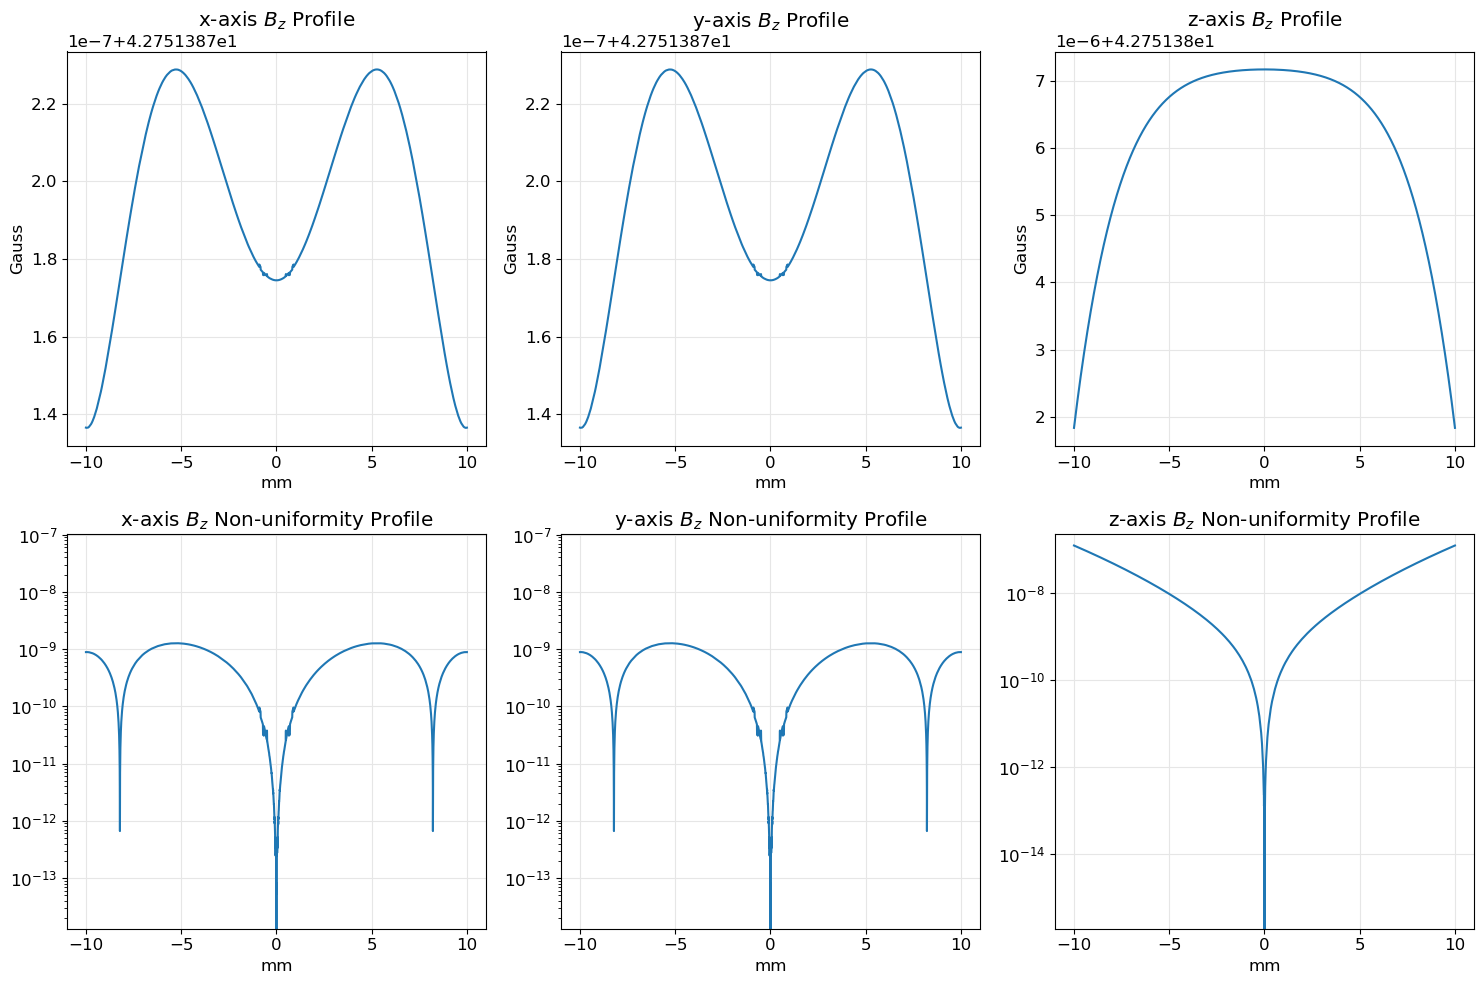

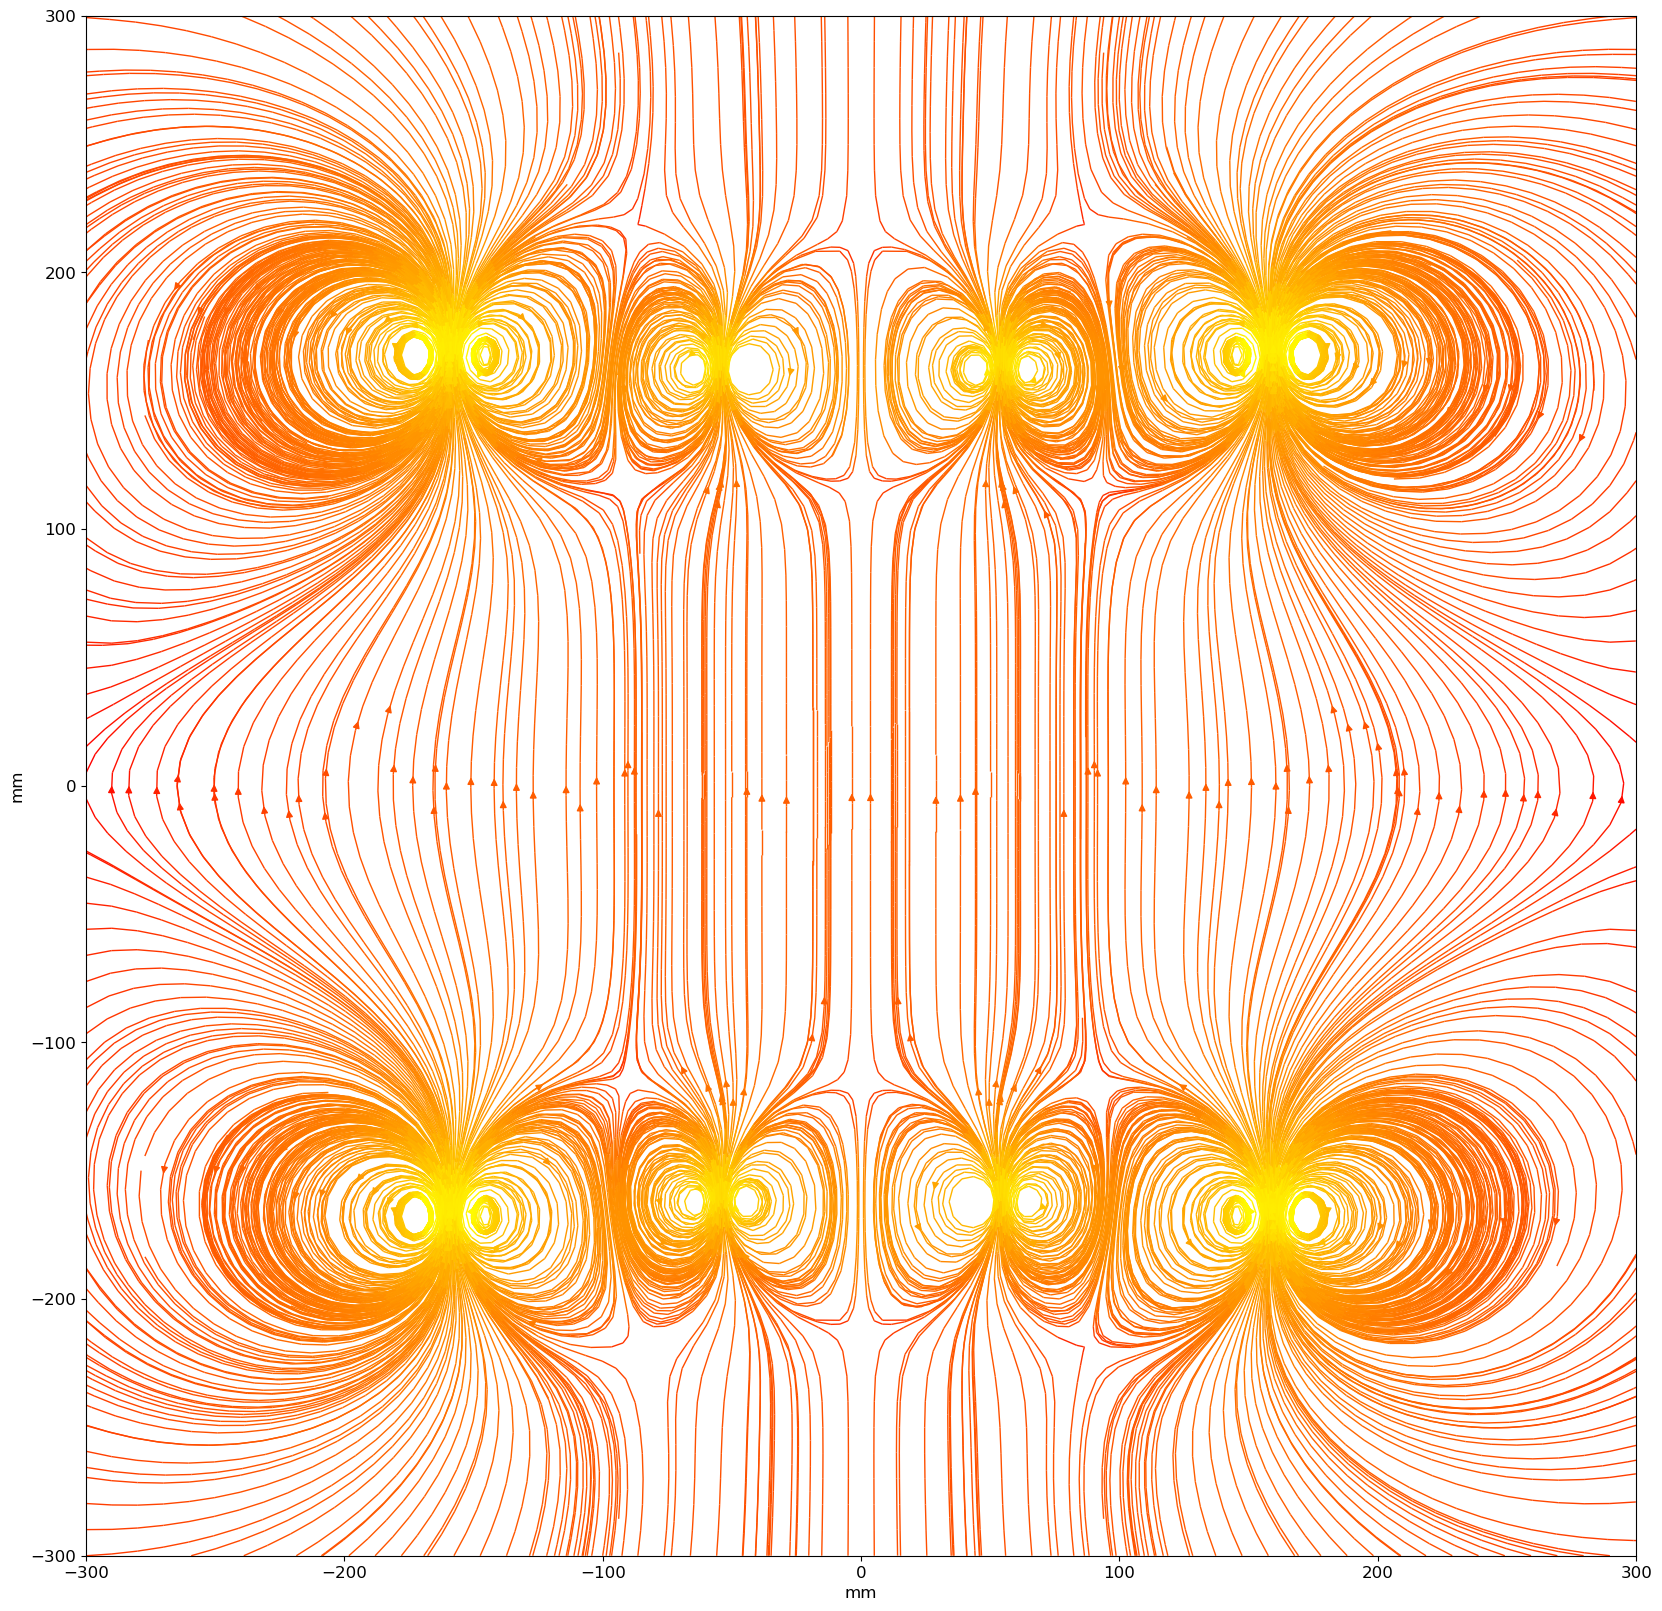

In [44]:
import pandas as pd
import numpy as np
from maggeometry import four_rings, n_rings
from maghelper import get_field_on_axes, get_nonuniformity, make_flux_stream, centered_sweep_range, get_grid_nonuniformity, make_grid, plot_uniform_region_side_view


Br = 1.09e3
mag_dir = (0,0,1)
mirror1_z = True
ringset_1_config = [Br, mag_dir, mirror1_z]

r = 1.09e3
mag_dir = (0,0,1)
mirror2_z = True
ringset_2_config = [Br, mag_dir, mirror2_z]
# innerrad, width, thickness, dist
bounds2 = ((1, 150), (2, 20), (2, 20), (1, 300),
           (1, 150), (2, 20), (2, 20), (1, 300))

# x = st2g[0]
x1 = results2_x[0]
print(x1)
a = [*ringset_1_config, *x1[0:4]]
print(a)
b = [*ringset_2_config, *x1[4:8]]
print(b)

obj_ring_config=[a, b]
magnets = n_rings(obj_ring_config)

sens_len = 10
get_field_on_axes(magnets, [[-sens_len, sens_len], [-sens_len, sens_len], [-sens_len, sens_len]], True)
x_bounds = [-300, 300]
z_bounds = [-300, 300]

make_flux_stream(magnets, x_bounds, z_bounds, [])
d = h =50
plot_uniform_region_side_view(magnets, [-d, d], [-h, h])

In [43]:
from maghelper import get_cuboid_nonuniformity_coverage
b= d
v_uni = get_cuboid_nonuniformity_coverage(magnets, [-d, d], [-b, b], [-h, h], 101)

Proportion of uniform region (<1e-6) in central 100 * 100 * 100 = 1000000 mm^3: 6.252%
Volume of uniform region (<1e-6): 62520.564 mm^3 = 62.521 cm^3


In [86]:
st2g2 = st1[5:10]
results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-17,
#             'maxiter':0.5e3
           }
with alive_bar(len(st2g2), force_tty=True) as bar:
    for s0 in st2g2:
        innerrad1, width1, thickness1 = s0[2:5]
        innerrad2, width2, thickness2, dist2 = s0[6:10]
        res2 = minimize(obj2_nonuniformity, [innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
print(results2_x)
print(results2_fun)

on 0: [120.99652309  11.44496932   4.06953278 147.91960699  15.1965081          
        11.2103605   78.38435151]


on 0: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_50927/2344889787.py:12: RuntimeWarning: Maximum number of function evaluations has been exceeded.
        res2 = minimize(obj2_nonuniformity, [innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2], method=method2, options=options2, bounds=bounds2)


on 1: [141.91532763   4.47989082   6.36514709 134.28098985   7.92708789         
         3.97134997  81.85782279]
on 2: [125.30070792  13.38018151   9.13372904 135.56652325  14.18378588         
        16.66273588  78.21171574]
on 3: [144.17204483  10.9018835   13.82580507 102.22842318  19.82908109         
         3.04445226  75.05501329]
on 4: Optimization terminated successfully.                                     
on 4:          Current function value: 0.000000                                 
on 4:          Iterations: 370                                                  
on 4:          Function evaluations: 826                                        
on 4: [149.99999164  10.32786534   6.40213565  96.08084805   7.27311798         
         2.08081226  71.3822858 ]
|████████████████████████████████████████| 5/5 [100%] in 2:52.4 (0.03/s)        
[array([120.99652309,  11.44496932,   4.06953278, 147.91960699,
        15.1965081 ,  11.2103605 ,  78.38435151]), array([141.91532763,

In [87]:
from maggeometry import n_rings, three_rings
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for x in results2_x:
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:3], 0], [*ringset_2_config, *x[3:7]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)

print(results2_nonun)
print(results2_g_center)

[3.216963615903097e-08, 1.074626373013218e-07, 3.839333373198834e-08, 6.431528704159967e-08, 8.612276255591128e-08]
[37.24220241207448, 10.00000000235886, 64.5103655481578, 38.596531967563976, 14.819278047638011]


In [91]:
bounds2 = ((2, 20), (2, 20), (2, 20), (2, 20), (1, 300))
def obj2_deviation(x):
    innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                       [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
#     magnets = three_rings(Br, innerrad1, innerrad2, width1, thickness1, dist2)
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    cost = abs(center_field - field_strength_target)
#     cost = np.log10(av_nonuniformity) + abs(center_field - field_strength_target)
    return cost

results2_x = []
results2_fun = []
method2 = 'Nelder-Mead'
options2 = {'disp':True, 'fatol': 1e-17,
#             'maxiter':0.5e3
           }
with alive_bar(len(st2g), force_tty=True) as bar:
    for s0 in st2g:
        def obj2_nonuniformity_fixed_rad(x):
            innerrad1 = s0[2]
            innerrad2 = s0[6]
            width1, thickness1, width2, thickness2, dist2 = x
            obj_ring_config = [[Br, mag_dir, mirror1_z, innerrad1, width1, thickness1, dist1],
                               [Br, mag_dir, mirror2_z, innerrad2, width2, thickness2, dist2]]
        #     magnets = three_rings(Br, innerrad1, innerrad2, width1, thickness1, dist2)
            magnets = n_rings(obj_ring_config)
            grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
#             cost = abs(center_field - field_strength_target)
#             cost = np.log10(av_nonuniformity) + abs(center_field - field_strength_target)
            cost = av_nonuniformity * abs(center_field - field_strength_target)
            return cost
        width1, thickness1 = s0[3:5]
        width2, thickness2, dist2 = s0[7:10]
        res2 = minimize(obj2_nonuniformity_fixed_rad, [width1, thickness1, width2, thickness2, dist2], method=method2, options=options2, bounds=bounds2)
        print(res2.x)
        results2_x.append(res2.x)
        results2_fun.append(res2.fun)
        bar()
        
print(results2_x)
print(results2_fun)

on 0: Optimization terminated successfully.                                     
on 0:          Current function value: 0.000001                                 
on 0:          Iterations: 473                                                  
on 0:          Function evaluations: 916                                        
on 0: [14.23834395 10.40789072  9.41809577 19.83653757 90.2714984 ]             
on 1: [18.21697422  2.00000017 19.12629692  2.01091452 89.29409477]             


on 1: /var/folders/06/7pjfbw510cz2ch1m7lx8vvl80000gn/T/ipykernel_50927/831269975.py:36: RuntimeWarning: Maximum number of function evaluations has been exceeded.
        res2 = minimize(obj2_nonuniformity_fixed_rad, [width1, thickness1, width2, thickness2, dist2], method=method2, options=options2, bounds=bounds2)


on 2: Optimization terminated successfully.                                     
on 2:          Current function value: 0.000000                                 
on 2:          Iterations: 235                                                  
on 2:          Function evaluations: 556                                        
on 2: [ 2.00007142  2.00000609  2.16584323  2.46662884 87.1183405 ]             
on 3: [19.97329813 20.         18.31835054 16.6228224  87.54306029]             
on 4: [19.62405213  2.17363672 16.55013714  2.         86.91847939]             
|████████████████████████████████████████| 5/5 [100%] in 1:59.5 (0.04/s)        
[array([14.23834395, 10.40789072,  9.41809577, 19.83653757, 90.2714984 ]), array([18.21697422,  2.00000017, 19.12629692,  2.01091452, 89.29409477]), array([ 2.00007142,  2.00000609,  2.16584323,  2.46662884, 87.1183405 ]), array([19.97329813, 20.        , 18.31835054, 16.6228224 , 87.54306029]), array([19.62405213,  2.17363672, 16.55013714,  2.      

In [93]:
from maggeometry import n_rings, three_rings
grid_res = 101
grid = make_xy_grid([-10, 10], [-10, 10], grid_res)
results2_nonun = []
results2_g_center = []
for i in range(len(results2_x)):
    width1, thickness1, width2, thickness2, dist2 = results2_x[i]
    innerrad1 = st2g[i][2]
    innerrad2 = st2g[i][6]
#     innerrad1, width1, thickness1, innerrad2, width2, thickness2, dist2 = x
    obj_ring_config=[[*ringset_1_config, *x[0:3], 0], [*ringset_2_config, *x[3:7]]]
    magnets = n_rings(obj_ring_config)
    grid_field, center_field, av_nonuniformity, max_abs_nonuniformity = get_grid_nonuniformity(magnets, grid, grid_res)
    results2_nonun.append(obj1_nonuniformity(x))
    results2_g_center.append(center_field)

print(results2_nonun)
print(results2_g_center)

[0.0013279820224343661, 0.0013279820224343661, 0.0013279820224343661, 0.0013279820224343661, 0.0013279820224343661]
[10.0, 10.0, 10.0, 10.0, 10.0]


In [118]:
from maghelper import make_opt_res2_csv

r2_x = np.array(results2_x)
r2_x = np.insert(r_x, 3, 0, axis=1)
make_opt_res2_csv('results/2023_07_12_stage2opt_4rings_1090T_', results2_nonun, results2_g_center, r2_x, results2_fun)

Number of unique results: 17
    nonuniformity  center_field_gauss  r_1_innerrad  r_1_width  r_1_thickness  \
0    7.979775e-07                10.0    150.000000  19.996841       7.292153   
1    7.983628e-07                10.0    149.999982  19.900953       7.322989   
2    8.016443e-07                10.0    149.822903  20.000000       7.274975   
3    8.022097e-07                10.0    150.000000  20.000000       7.290980   
4    8.177803e-07                10.0    149.891733  20.000000       7.280847   
5    8.488074e-07                10.0    150.000000  19.999981       7.290366   
6    8.630953e-07                10.0    150.000000  16.174161       8.803304   
7    8.858650e-07                10.0    145.925076  20.000000       6.923850   
8    9.590014e-07                10.0    149.999293  20.000000       7.289532   
9    9.952847e-07                10.0    149.999937  19.998945       7.293496   
10   1.141181e-06                10.0    150.000000  19.999212       7.294070   

(array([[7.97977529e-07, 1.00000000e+01, 1.50000000e+02, 1.99968407e+01,
         7.29215266e+00, 2.70582713e+02, 1.13753801e-17],
        [7.98362759e-07, 1.00000000e+01, 1.49999982e+02, 1.99009531e+01,
         7.32298874e+00, 2.70506393e+02, 8.29633631e-18],
        [8.01644319e-07, 1.00000000e+01, 1.49822903e+02, 2.00000000e+01,
         7.27497546e+00, 2.70284201e+02, 4.02993802e-18],
        [8.02209738e-07, 1.00000000e+01, 1.50000000e+02, 2.00000000e+01,
         7.29097982e+00, 2.70580541e+02, 2.06982812e-17],
        [8.17780301e-07, 1.00000000e+01, 1.49891733e+02, 2.00000000e+01,
         7.28084732e+00, 2.70389346e+02, 7.23429476e-18],
        [8.48807400e-07, 1.00000000e+01, 1.50000000e+02, 1.99999808e+01,
         7.29036580e+00, 2.70562571e+02, 4.89276177e-18],
        [8.63095273e-07, 1.00000000e+01, 1.50000000e+02, 1.61741609e+01,
         8.80330421e+00, 2.67469765e+02, 1.69491412e-17],
        [8.85864976e-07, 1.00000000e+01, 1.45925076e+02, 2.00000000e+01,
         6